# Exploratory Data Analysis for Data set A

# Step 1 - Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from google.colab import data_table
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
# Imported CompanyA.csv
CompanyA = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/DatasetA.csv')

CompanyA = CompanyA[CompanyA['BookingStatus'] == 'Attending']

print(CompanyA.head())

                                           EventName         StartDate  \
0  Neoliberalism. the Family. and Bourgeois Domes...  10/12/2021 15:00   
1                                 Queer Homemaking I  22/10/2021 15:00   
2  Neoliberalism. the Family. and Bourgeois Domes...  10/12/2021 15:00   
3                                 Queer Homemaking I  22/10/2021 15:00   
4  Neoliberalism. the Family. and Bourgeois Domes...  10/12/2021 15:00   

       EventType BookingReference AttendeeReference  GroupSize  \
0        Seminar          B953419          A1021430          1   
1  Reading Group          B954541          A1022562          1   
2        Seminar          B956238          A1024268          1   
3  Reading Group          B959604          A1027663          1   
4        Seminar          B959608          A1027667          1   

   IsLeadAttendee  AttendeeGrossCost  EventId BookingStatus AttendeeType  \
0            True                0.0    24077     Attending     Attendee   
1     

In [4]:
def event_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['eventdayofweek'] = dfs.StartDate.dt.dayofweek
    dfs['eventquarter'] = dfs.StartDate.dt.quarter
    dfs['eventmonth'] = dfs.StartDate.dt.month
    dfs['eventyear'] = dfs.StartDate.dt.year
    dfs['eventdayofyear'] = dfs.StartDate.dt.dayofyear
    dfs['eventdayofmonth'] = dfs.StartDate.dt.day
    dfs['eventweekofyear'] = dfs.StartDate.dt.isocalendar().week
    return dfs

def Booking_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['Bookingdayofweek'] = dfs.StatusCreatedDate.dt.dayofweek
    dfs['Bookingquarter'] = dfs.StatusCreatedDate.dt.quarter
    dfs['Bookingmonth'] = dfs.StatusCreatedDate.dt.month
    dfs['Bookingyear'] = dfs.StatusCreatedDate.dt.year
    dfs['Bookingdayofyear'] = dfs.StatusCreatedDate.dt.dayofyear
    dfs['Bookingdayofmonth'] = dfs.StatusCreatedDate.dt.day
    dfs['Bookingweekofyear'] = dfs.StatusCreatedDate.dt.isocalendar().week
    return dfs

# Company A

In [5]:
#Formating and adding new columns to the dataset
CompanyA['StatusCreatedDate'] = pd.to_datetime(CompanyA['StatusCreatedDate'], infer_datetime_format=True)
CompanyA['StartDate'] = pd.to_datetime(CompanyA['StartDate'], infer_datetime_format=True)
CompanyA['BookingDaysToEvent'] = abs((CompanyA['StartDate'] - CompanyA['StatusCreatedDate']).dt.days)
CompanyA['BookingWeeksToEvent'] = round(CompanyA['BookingDaysToEvent']/7,0)
CompanyA['Bookingweeknumber'] = pd.DatetimeIndex(CompanyA['StatusCreatedDate']).week
CompanyA['eventWeeknumber'] = pd.DatetimeIndex(CompanyA['StartDate']).week

# To create Season column
_condition_winter = (CompanyA.StartDate.dt.month>=1)&(CompanyA.StartDate.dt.month<=3)
_condtion_spring = (CompanyA.StartDate.dt.month>=4)&(CompanyA.StartDate.dt.month<=6)
_condition_summer = (CompanyA.StartDate.dt.month>=7)&(CompanyA.StartDate.dt.month<=9)
_condition_autumn = (CompanyA.StartDate.dt.month>=10)&(CompanyA.StartDate.dt.month<=12)

CompanyA['EventSeason'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

<ipython-input-5-e6473cdcc197>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyA['Bookingweeknumber'] = pd.DatetimeIndex(CompanyA['StatusCreatedDate']).week
<ipython-input-5-e6473cdcc197>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyA['eventWeeknumber'] = pd.DatetimeIndex(CompanyA['StartDate']).week


In [ ]:
CompanyA.head()
# data_table.DataTable(Company)

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,BookingDaysToEvent,BookingWeeksToEvent,Bookingweeknumber,eventWeeknumber,EventSeason
0,Neoliberalism. the Family. and Bourgeois Domes...,2021-10-12 15:00:00,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,2021-05-03 16:27:00,219,161,23.0,18,41,Autumn
1,Queer Homemaking I,2021-10-22 15:00:00,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,2021-08-03 17:02:00,219,79,11.0,31,42,Autumn
2,Neoliberalism. the Family. and Bourgeois Domes...,2021-10-12 15:00:00,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,2021-10-03 16:44:00,219,8,1.0,39,41,Autumn
3,Queer Homemaking I,2021-10-22 15:00:00,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,2021-03-16 17:33:00,219,219,31.0,11,42,Autumn
4,Neoliberalism. the Family. and Bourgeois Domes...,2021-10-12 15:00:00,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,2021-03-16 17:35:00,219,209,30.0,11,41,Autumn


2.0 EDA Tables

In [6]:
Seaons_df = CompanyA.groupby(['EventType', 'EventSeason', 'EventId', 'BookingWeeksToEvent']).aggregate({'GroupSize':'sum'}).reset_index()
Seaons_df.head()

,EventType,EventSeason,EventId,BookingWeeksToEvent,GroupSize
0,Colloquium,Autumn,25191,0.0,5
1,Colloquium,Autumn,25191,1.0,3
2,Colloquium,Autumn,25191,2.0,2
3,Colloquium,Autumn,25191,4.0,22
4,Colloquium,Autumn,25191,15.0,1


In [ ]:
Seaons_df['EventSeason'].unique()

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

In [7]:
min_result = CompanyA.groupby(['EventType', 'EventSeason', 'EventId']).aggregate({'GroupSize':'sum','BookingWeeksToEvent':'min'}).reset_index()
min_result.columns = ['EventType', 'Season','EventId', 'TotalTickets', 'LastBookingWeek']

max_result = CompanyA.groupby(['EventType','EventSeason', 'EventId']).aggregate({'GroupSize':'sum', 'BookingWeeksToEvent':'max'}).reset_index()
max_result.columns = ['EventType2', 'Season2',  'EventId2', 'TotalTickets2', 'FirstBookingWeek']

result_df = pd.concat([min_result, max_result], axis=1, join="inner")

result_df['TotalWeeksToSell'] = result_df['FirstBookingWeek'] - result_df['LastBookingWeek']
result_df.drop(columns=['EventType2', 'TotalTickets2', 'Season2',  'EventId2'], inplace=True)
result_df

,EventType,Season,EventId,TotalTickets,LastBookingWeek,FirstBookingWeek,TotalWeeksToSell
0,Colloquium,Autumn,25191,35,0.0,45.0,45.0
1,Colloquium,Autumn,25996,131,4.0,37.0,33.0
2,Colloquium,Autumn,26020,20,4.0,39.0,35.0
3,Colloquium,Spring,25770,34,0.0,18.0,18.0
4,Colloquium,Spring,26063,74,0.0,25.0,25.0
...,...,...,...,...,...,...,...
1370,Workshop,Summer,26197,86,0.0,30.0,30.0
1371,Workshop,Summer,26276,5,4.0,14.0,10.0
1372,Workshop,Summer,26280,191,0.0,26.0,26.0
1373,Workshop,Winter,25832,30,0.0,36.0,36.0


2.1 EDA Graphs

In [8]:
# Plotting graphs
def ploting(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', marker='*')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    # plt.savefig(title, bbox_inches='tight')

In [9]:
#Plotting with numbers as markers
import pylab as pl
def ploting2(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    pl.figure(figsize=(20,5), dpi=dpi)
    pl.plot(x, y, marker='*')
    for x, y in zip(x, y):
      pl.text(x, y, str(y), color="red", fontsize=12)
      pl.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    pl.margins(0.1)

In [10]:
def plotbar(xa, ya, xlable, ylabel, title):
  x = xa
  y = ya

  x = np.arange(len(x)) # the label locations
  width = 0.35 # the width of the bars

  fig, ax = plt.subplots()

  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlable)
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(xa)

  pps = ax.bar(x, y, width, label=x)
  for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

  plt.show()

Plotting average ticket Booking per season for weeks to events

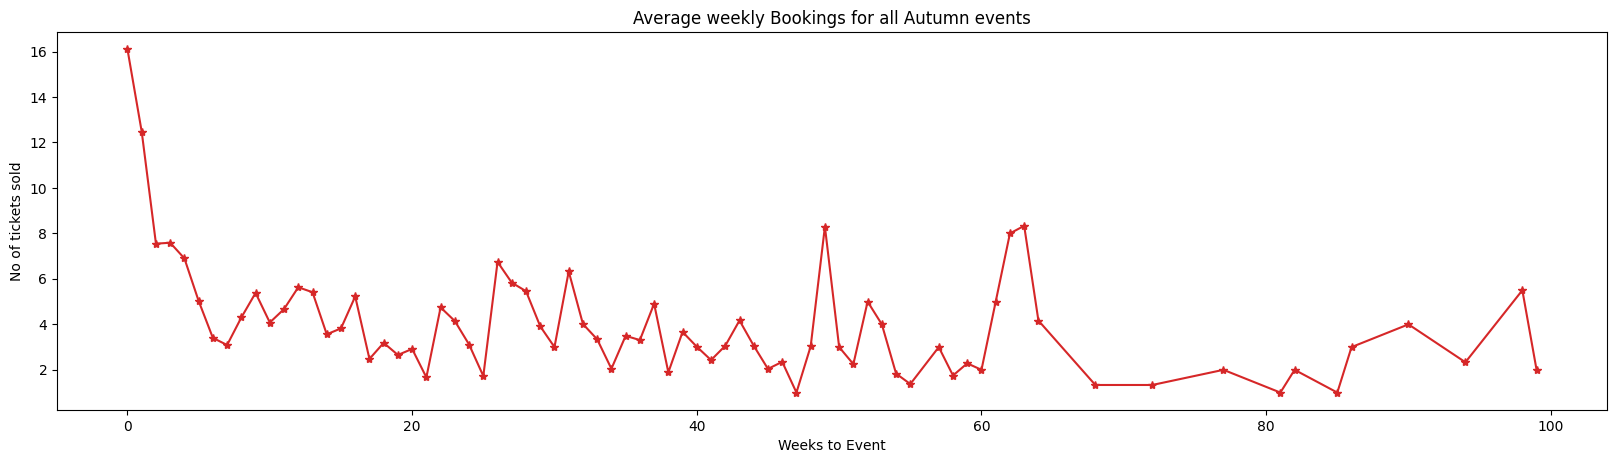

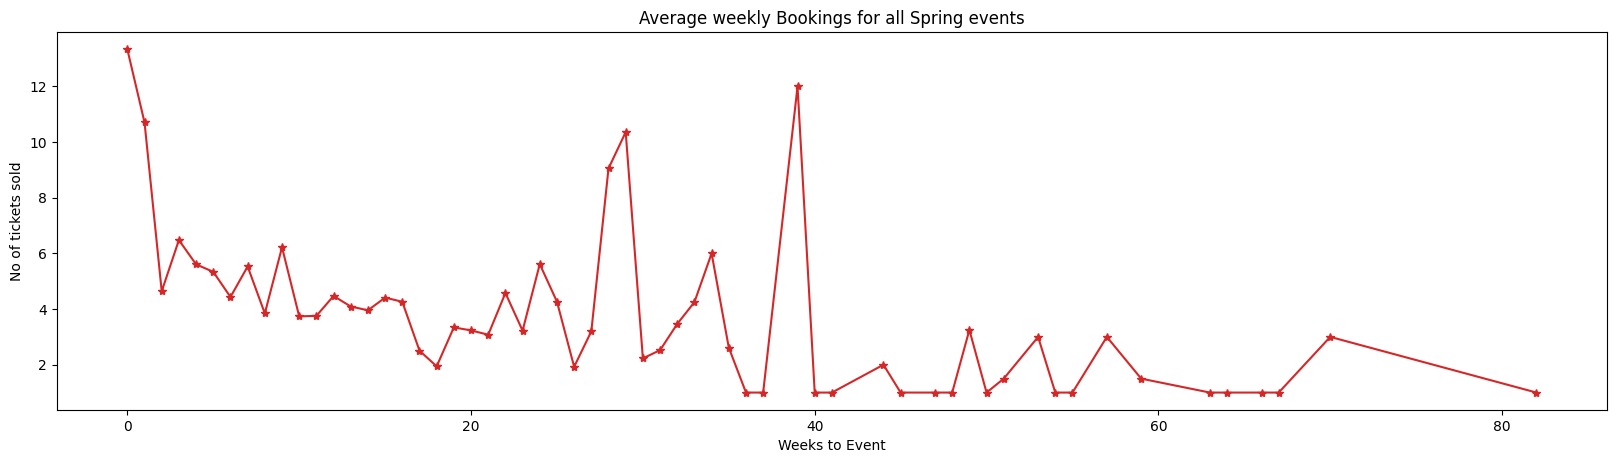

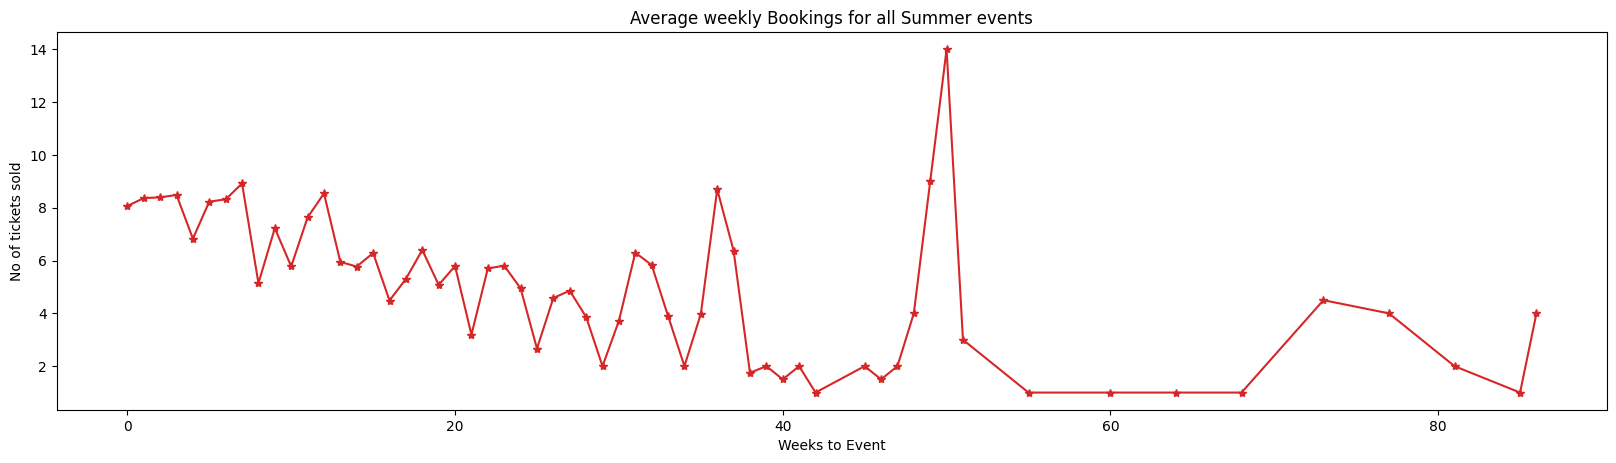

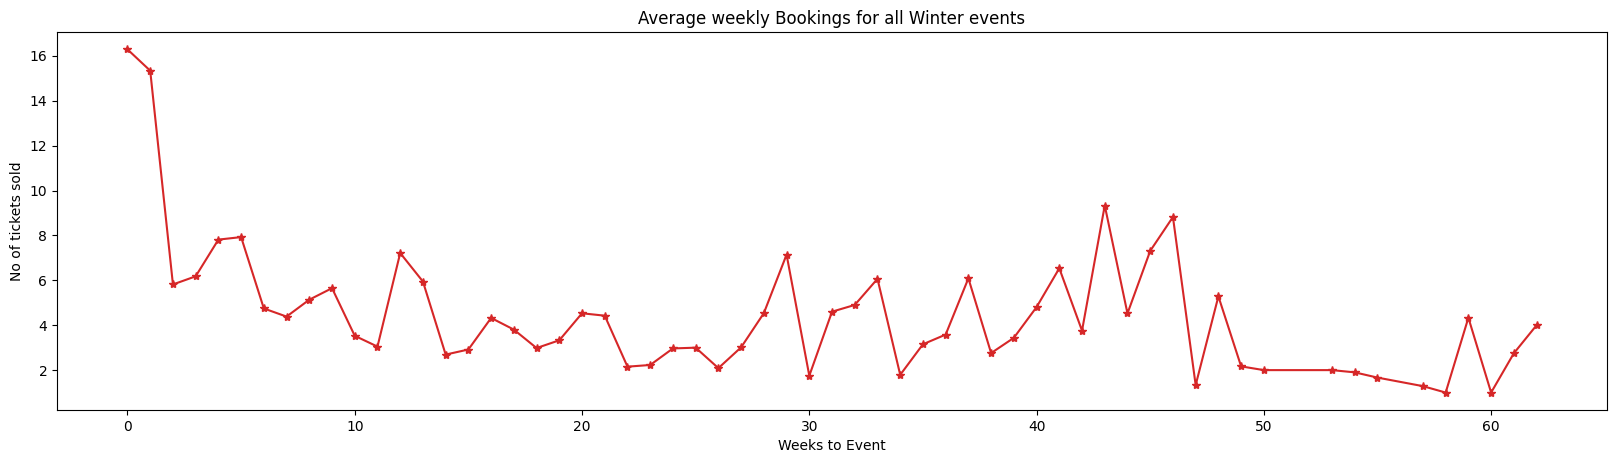

In [11]:
#Plotting average ticket Booking per season
Autumn_df = Seaons_df[Seaons_df['EventSeason'] == 'Autumn'].groupby('BookingWeeksToEvent').mean()
Spring_df = Seaons_df[Seaons_df['EventSeason'] == 'Spring'].groupby('BookingWeeksToEvent').mean()
Summer_df = Seaons_df[Seaons_df['EventSeason'] == 'Summer'].groupby('BookingWeeksToEvent').mean()
Winter_df = Seaons_df[Seaons_df['EventSeason'] == 'Winter'].groupby('BookingWeeksToEvent').mean()

ploting(Autumn_df, Autumn_df.index, Autumn_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Autumn events' )
ploting(Spring_df, Spring_df.index, Spring_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Spring events' )
ploting(Summer_df, Summer_df.index, Summer_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Summer events' )
ploting(Winter_df, Winter_df.index, Winter_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Winter events' )

# Spring_df.GroupSize.plot(legend=True, figsize=(20,10))



Average ticket Booking per weeks to event for each event type

In [13]:
eventsTypes = Seaons_df['EventType'].unique()
print(eventsTypes)

['Colloquium ' 'Conference / Symposium' 'Exhibition' 'Lecture'
 'Lunchtime Lecture' 'Other Events' 'Reading Group' 'Research Training'
 'Seminar' 'Short Course' 'Summer School' 'Workshop']


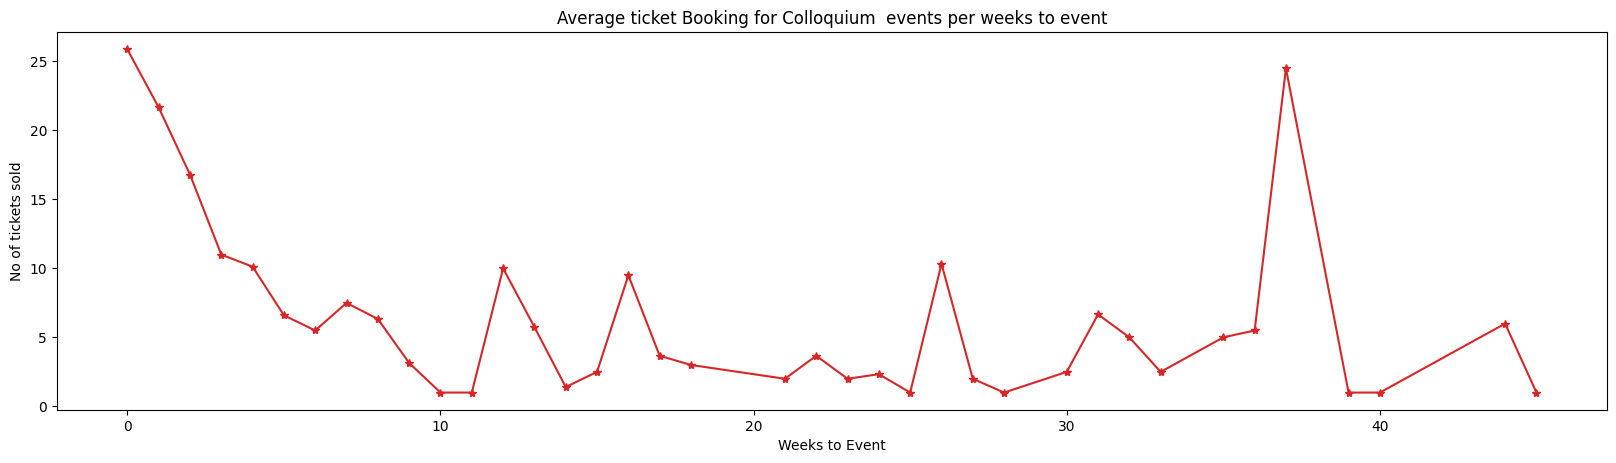

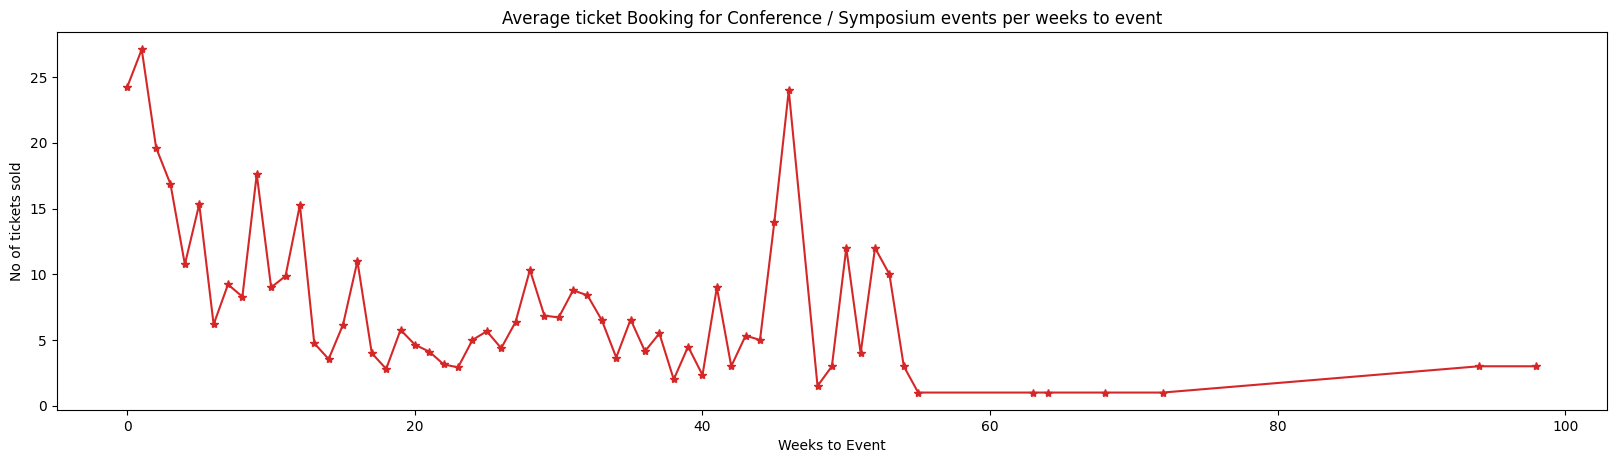

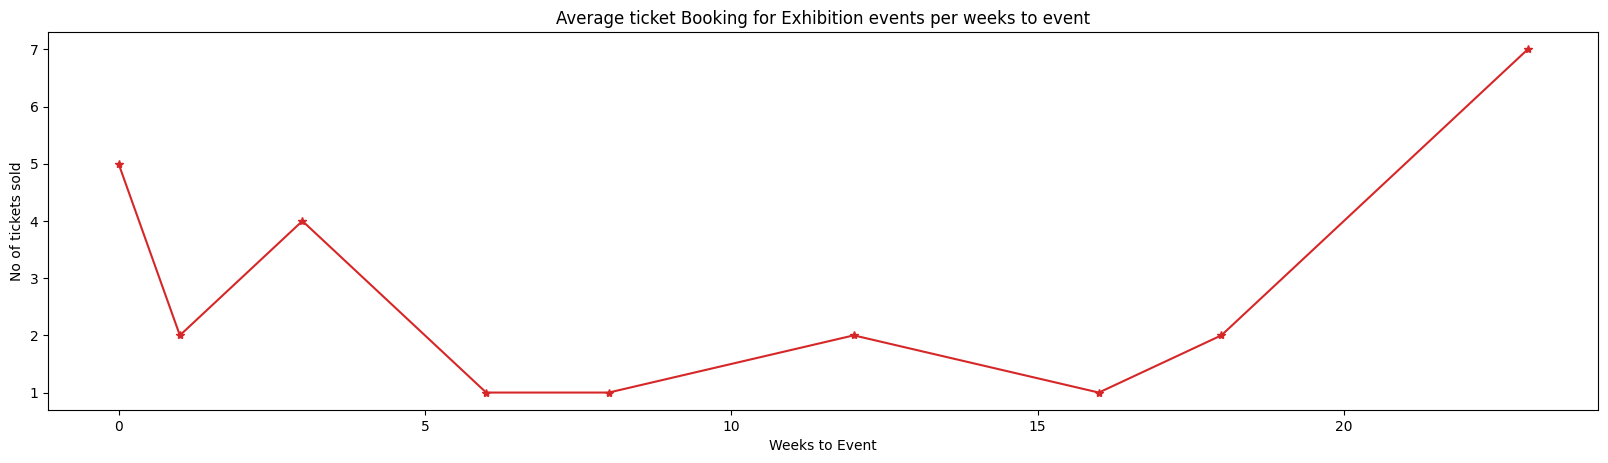

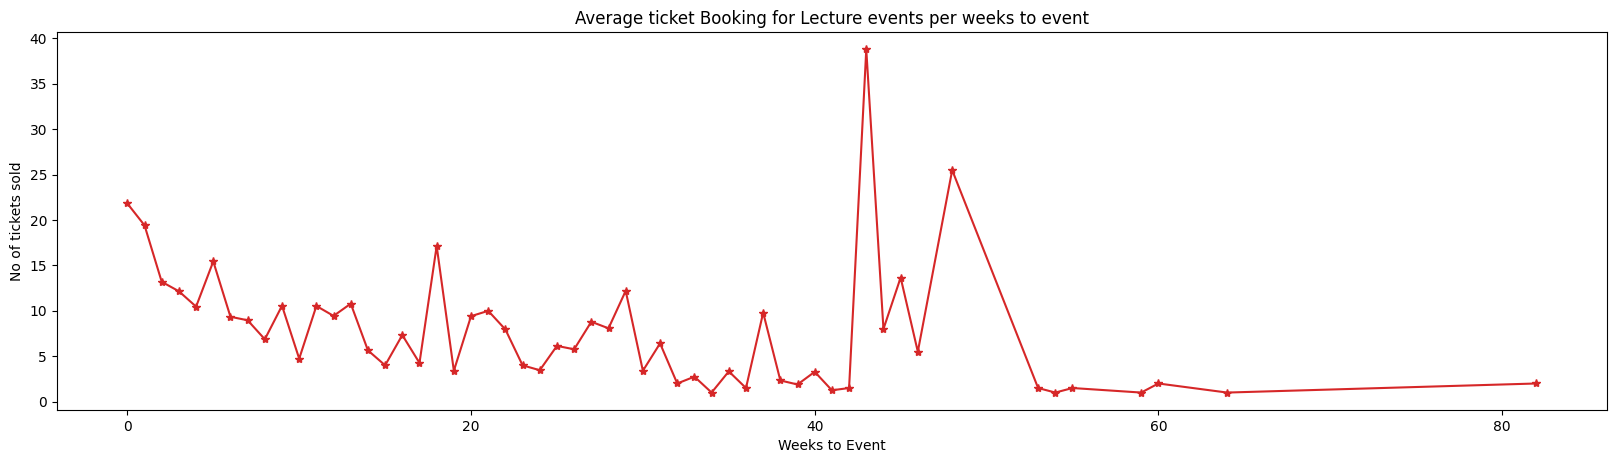

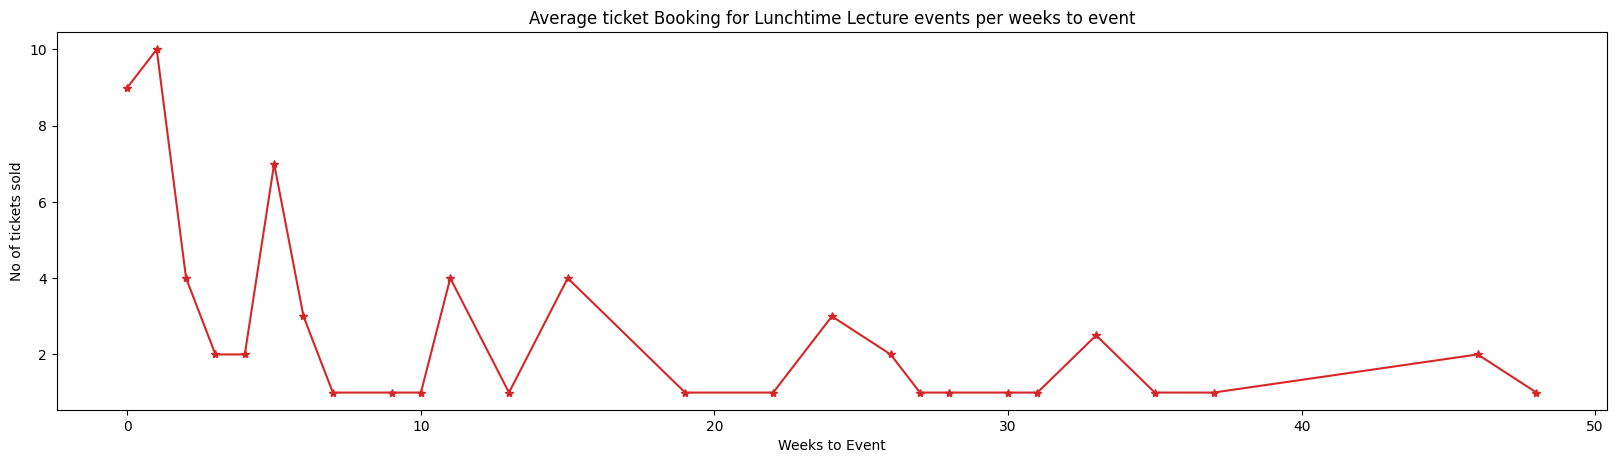

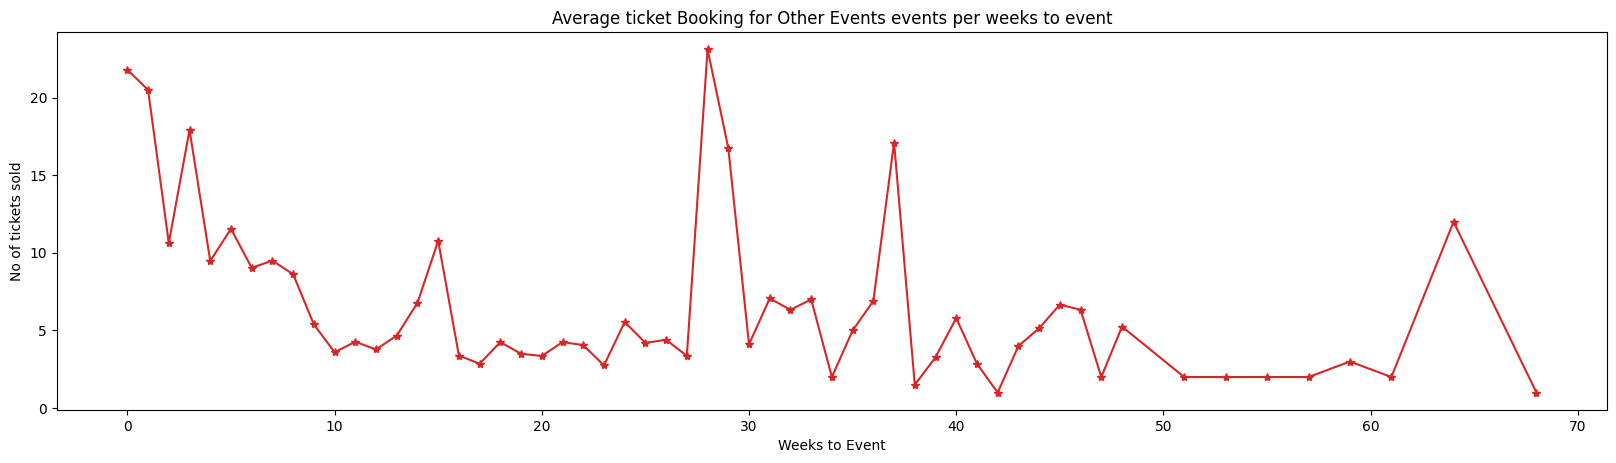

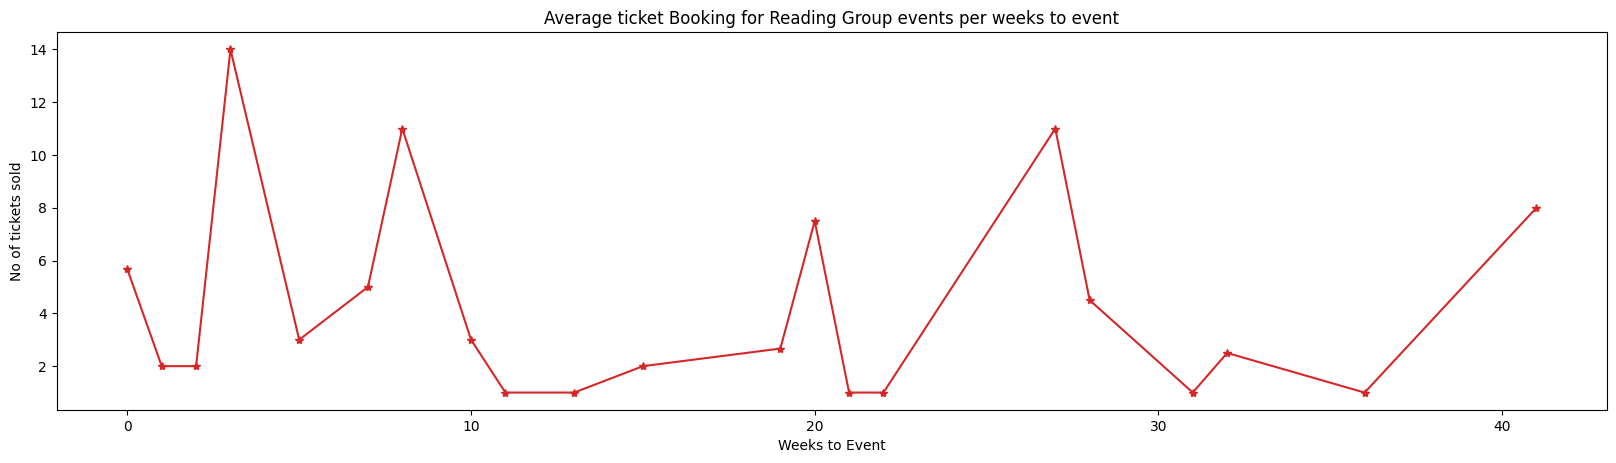

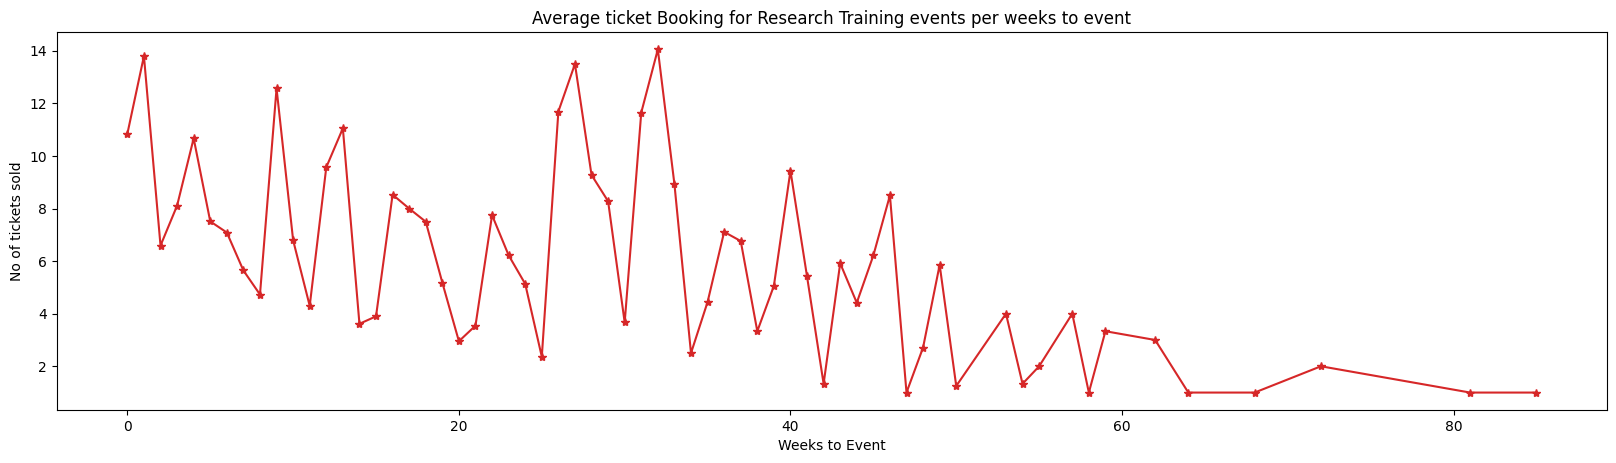

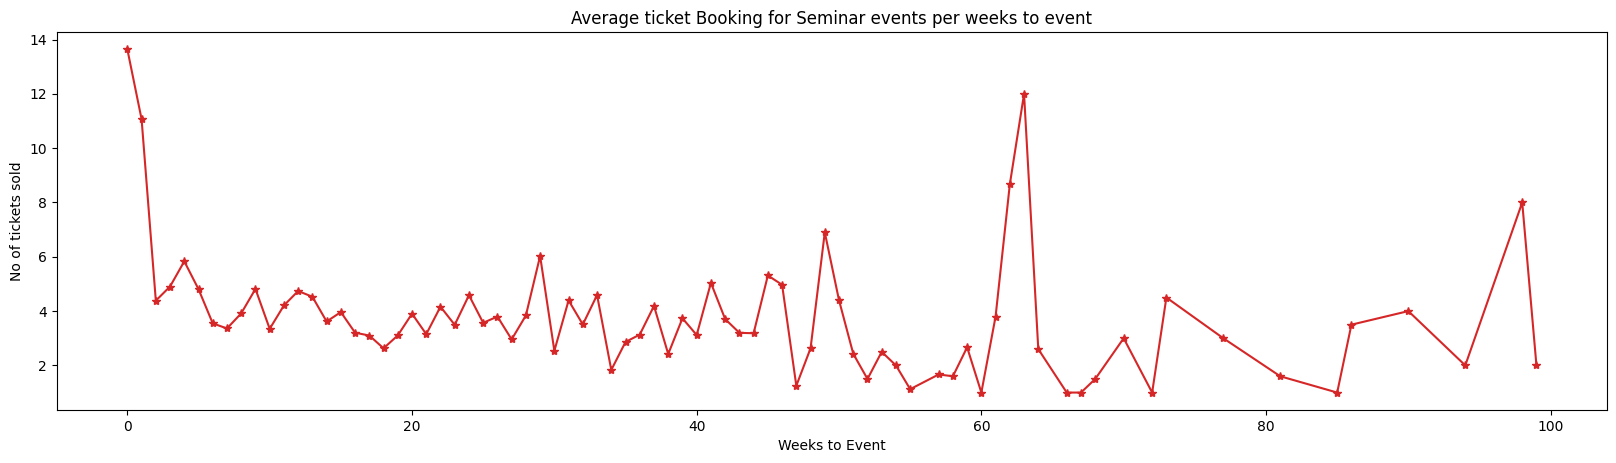

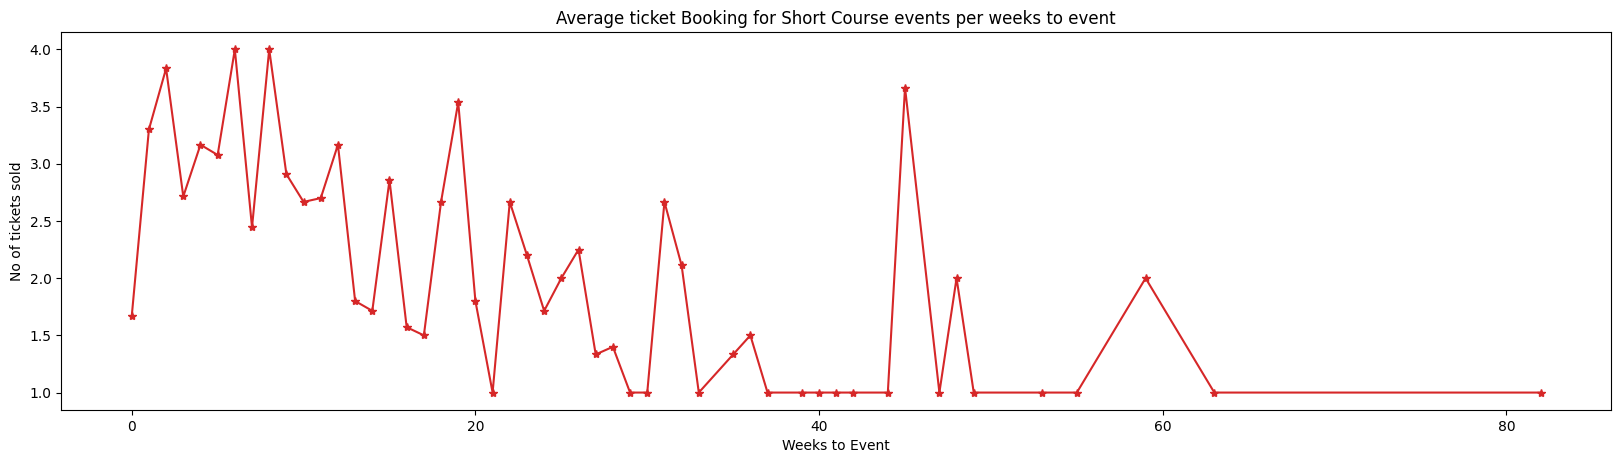

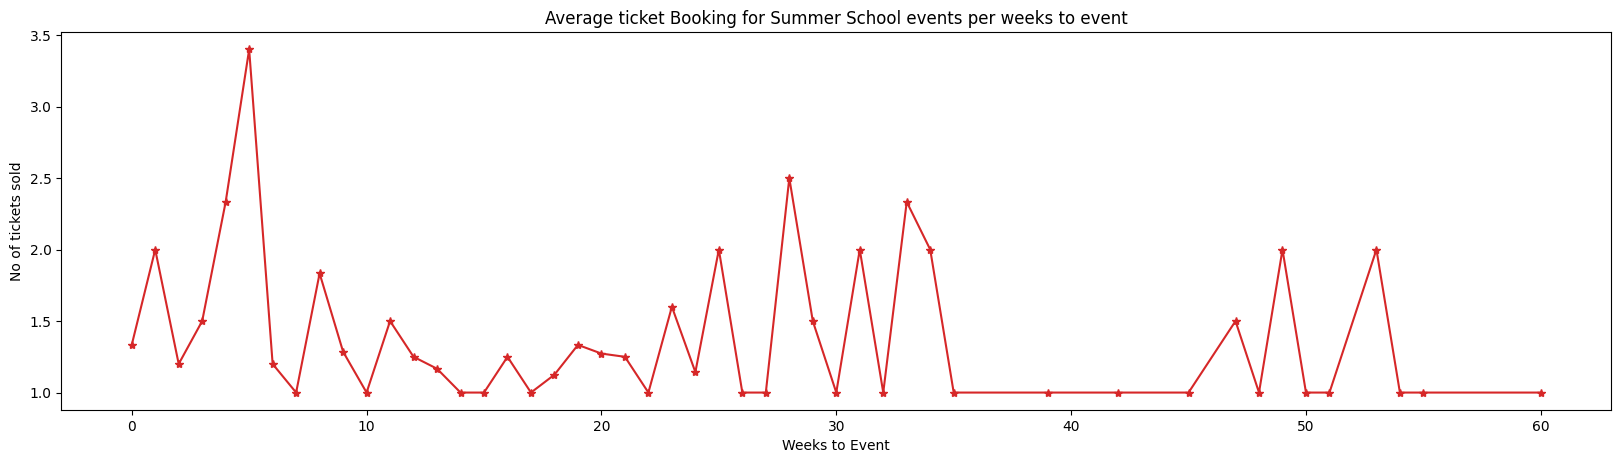

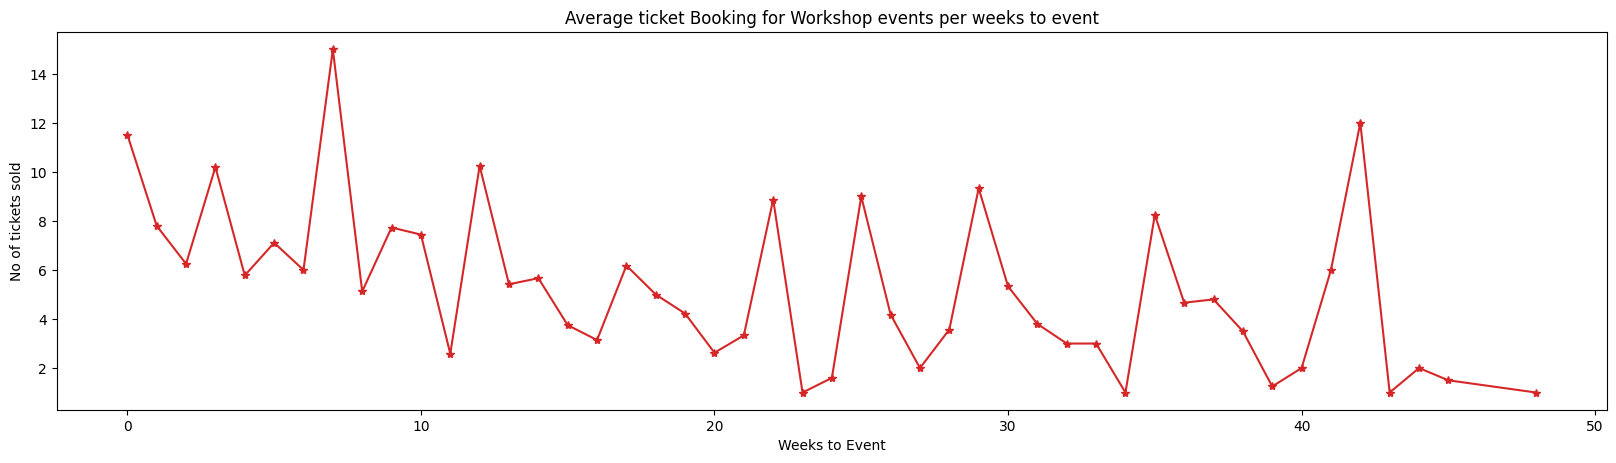

In [ ]:
for event in eventsTypes:
  # event_df = Seaons_df[Seaons_df['EventSeason'] == 'Autumn']#.groupby('BookingWeeksToEvent').sum()
  event_df = Seaons_df[Seaons_df['EventType'] == event].groupby('BookingWeeksToEvent').mean()
  # print(event_df)
  ploting(event_df, event_df.index, event_df.GroupSize, xlabel='Weeks to Event', title= 'Average ticket Booking for ' +event+ ' events per weeks to event' )

Average first week of Booking per season - when tickets starts selling

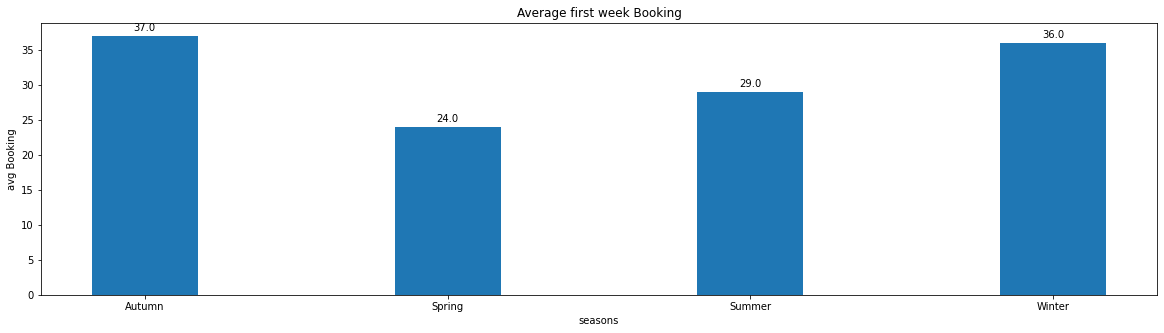

In [ ]:
first_Booking = result_df.groupby(['Season']).aggregate({'FirstBookingWeek':'mean'}).reset_index()
first_Booking['FirstBookingWeek'] = round(first_Booking['FirstBookingWeek'])
plotbar(first_Booking['Season'], first_Booking['FirstBookingWeek'], 'seasons', 'avg Booking',  'Average first week Booking')

Average last week ticket Booking

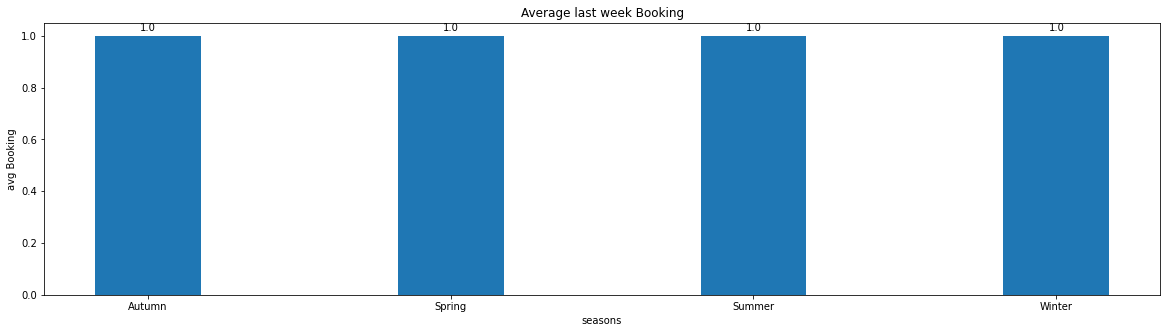

In [ ]:
last_Booking = result_df.groupby(['Season']).aggregate({'LastBookingWeek':'mean'}).reset_index()
last_Booking['LastBookingWeek'] = round(last_Booking['LastBookingWeek'])
plotbar(last_Booking['Season'], last_Booking['LastBookingWeek'], 'seasons', 'avg Booking',  'Average last week Booking')

Average total weeks to sell tikcets

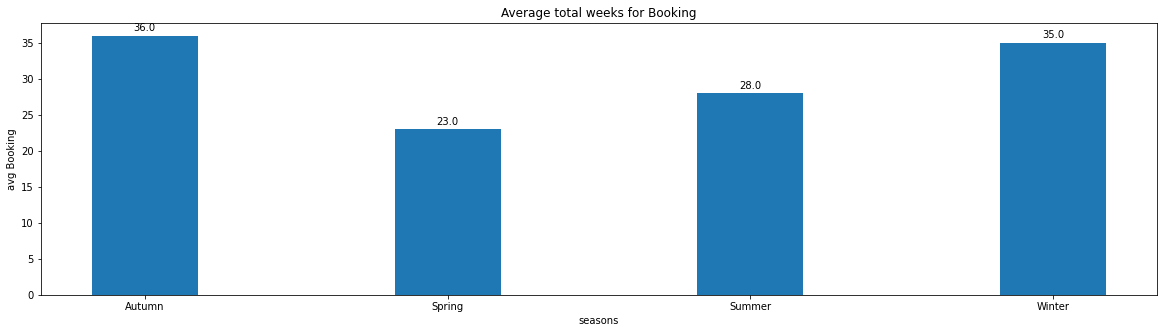

In [ ]:
total_Booking = result_df.groupby(['Season']).aggregate({'TotalWeeksToSell':'mean'}).reset_index()
total_Booking['TotalWeeksToSell'] = round(total_Booking['TotalWeeksToSell'])
plotbar(total_Booking['Season'], total_Booking['TotalWeeksToSell'], 'seasons', 'avg Booking',  'Average total weeks for Booking')